In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
x_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
x=pd.concat([x_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# KNN

## Model ve Tahmin

In [5]:
knn_model=KNeighborsRegressor().fit(x_train,y_train)

In [6]:
knn_model.n_neighbors #komşu sayısı 

5

In [7]:
knn_model.metric

'minkowski'

In [6]:
dir(knn_model)#alınabilecek bazı değerler ve fonksiyonlar(class mantığı)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'feature_names_in_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_s

In [9]:
knn_model.predict(x_test)[0:10]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ,  325.5   ,
        216.5   ,  101.5   ,  982.    ,  886.6666])

In [10]:
y_pred=knn_model.predict(x_test)

In [11]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

## Model Tuning 

In [12]:
for k in range(10):
    k=k+1
    knn_model=KNeighborsRegressor(n_neighbors=k).fit(x_train,y_train)
    y_pred=knn_model.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print("k=",k,"için rmse değeri",rmse)
#el yordamıyla hangi k değeri yani komşu sayısı için az hata olcağını hesaplamadık

k= 1 için rmse değeri 455.03925390751965
k= 2 için rmse değeri 415.99629571490965
k= 3 için rmse değeri 420.6765370082348
k= 4 için rmse değeri 428.8564674588792
k= 5 için rmse değeri 426.6570764525201
k= 6 için rmse değeri 423.5071669008732
k= 7 için rmse değeri 414.9361222421057
k= 8 için rmse değeri 413.7094731463598
k= 9 için rmse değeri 417.84419990871265
k= 10 için rmse değeri 421.6252180741266


In [13]:
#makine yordamıyla #gridsearchcv=parametrelere arasından en az hatalı sonucu vercek parametreyi araştırır,seçer cv kullanarak cv zaten doğrulamak için kullanılıyodu


In [14]:
knn_params={"n_neighbors":np.arange(1,30,1)}

In [15]:
knn=KNeighborsRegressor()

In [16]:
knn_cv_model=GridSearchCV(knn,knn_params,cv=10).fit(x_train,y_train)

In [17]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [18]:
#final modeli kurma

In [19]:
knn_tuned=KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(x_train,y_train)

In [20]:
y_pred=knn_tuned.predict(x_test)

In [21]:
np.sqrt(mean_squared_error(y_test,y_pred))

413.7094731463598

# Destek Vektör Regresyonu ( Support Vector Regression)

## Model ve Tahmin

In [33]:
svr_model=SVR("linear").fit(x_train,y_train)#doğrusal denklem

In [34]:
svr_model.kernel

'linear'

In [35]:
svr_model=SVR("rbf").fit(x_train,y_train)#doğrusal olmayan denklemler

In [36]:
svr_model.kernel

'rbf'

In [23]:
dir(svr_model)

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_pairwise',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_validate_data',
 '_validate_for_predict',
 '_validate_targets',
 '_warn_from

In [25]:
svr_model.predict(x_train)[0:5]

array([219.32622627, 702.43039317, 623.20559641, 153.77538484,
       463.15191157])

In [26]:
svr_model.predict(x_test)[0:5]

array([679.14754919, 633.72883529, 925.68639938, 270.28464317,
       530.26659421])

In [29]:
svr_model.intercept_#bu algoritma çözümünde denklem kurma olduğundan böyle parametreler alabiliyoruz
#ama knnde bu durum yoktu orda sadece komşu değerler üzerinden işlem yapılmıştı

array([-80.15196063])

In [30]:
svr_model.coef_

array([[ -1.2183904 ,   6.09602978,  -3.67574533,   0.14217072,
          0.51435925,   1.28388992,  12.55922527,  -0.08693754,
          0.46597185,   2.98259931,   0.52944513,  -0.79820793,
         -0.16015531,   0.30872795,   0.28842348,  -1.79560066,
          6.41868986, -10.74313785,   1.33374319]])

In [24]:
y_pred=svr_model.predict(x_test)

In [31]:
np.sqrt(mean_squared_error(y_test,y_pred))#valide edilmemiş optimum olmayan ilkel test hatası

370.0408415795005

## Model Tuning

In [38]:
svr_model=SVR("linear")

In [37]:
svr_params={"C":[0.1,0.5,1,3]}

In [39]:
svr_cv_model=GridSearchCV(svr_model,svr_params,cv=5,verbose=2,n_jobs=-1).fit(x_train,y_train)#bu son 2 parametre işlemleri gösterir ve işlemcinin maks güçte çalışmasının sağlar

In [41]:
svr_cv_model.best_params_

{'C': 0.5}

In [42]:
svr_tuned=SVR("linear",C=0.5).fit(x_train,y_train)

In [43]:
y_pred=svr_tuned.predict(x_test)

In [44]:
np.sqrt(mean_squared_error(y_test,y_pred))#valide edilmiş optimum olan ilkel test hatası

367.98747616655294

# Yapay Sinir Ağları 

## Model ve Tahmin

In [81]:
#normalde bazı algoritma standartlaştırılmış bazılar standartlaştırılmamış parametreleri sever ysa da sevdiği için yapıcaz
#normalizasyon aykırı verilerden(x) kurtulma homojene çevirme demek yani bu işlem bağımsız değişkenlere uygulancak
#standartizasyon, verileri 0 ve 1 arasında yeniden ölçekler. Bu işlem tüm parametrelerin aynı pozitif ölçeğe sahip olması gereken bazı durumlarda yararlı olabilir. ... normalizasyon ise veriyi aynı ortalama (0) ve aynı standart sapmaya (1) sahip olması için yeniden ölçeklendirilmesidir.yani verinin yapısını deiştirnez

In [45]:
scaler=StandardScaler()

In [58]:
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
scaler.fit(x_test)
x_test_scaled=scaler.transform(x_test)

In [59]:
mlp_model=MLPRegressor().fit(x_train_scaled,y_train)

In [60]:
dir(mlp_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_check_n_features',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_partial_fit',
 '_random_state',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_data',
 '_validate_hyperparameters',
 '_validate_input',
 'activation',
 'alpha',
 'batch_size',
 'b

In [61]:
mlp_model.predict(x_train_scaled)[0:5]

array([ 8.14265066, 52.0992439 , 32.99324524,  6.97472054,  6.36382453])

In [62]:
y_pred=mlp_model.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

657.0553973399678

## Model Tuning

In [69]:
mlp_model=MLPRegressor().fit(x_train_scaled,y_train)

In [68]:
mlp_params={"alpha":[0.1,0.01,0.2,0.001,0.0001],
            "hidden_layer_sizes":[(10,20),(5,5),(100,100)]}#(10,10)2 gizli katmanı var biri 10 dieri de 10

In [75]:
mlp_cv_model=GridSearchCV(mlp_model,mlp_params,cv=10,verbose=2,n_jobs=-1).fit(x_train_scaled,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [76]:
mlp_cv_model.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}

In [79]:
mlp_model_tuned=MLPRegressor(alpha=0.0001,hidden_layer_sizes=(100, 100)).fit(x_train_scaled,y_train)

In [80]:
y_pred=mlp_model_tuned.predict(x_train_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))#357 gibi bi değer gelcek neden error verdi anlamadım

ValueError: Found input variables with inconsistent numbers of samples: [66, 197]

# CART(Classification And Regression Tree)

## Model ve Tahmin

In [ ]:
#tek değişkenli modelleme ve tahmini

In [83]:
x_train=pd.DataFrame(x_train["Hits"])
x_test=pd.DataFrame(x_test["Hits"])

In [97]:
cart_model=DecisionTreeRegressor(max_leaf_nodes=10)

In [98]:
cart_model.fit(x_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

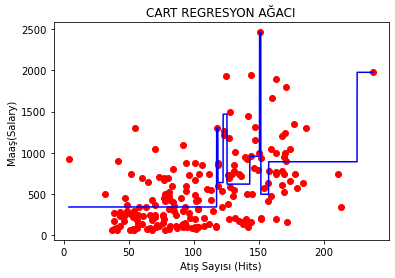

In [99]:
x_grid=np.arange(min(np.array(x_train)),max(np.array(x_train)),0.01)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x_train,y_train,color="red")
plt.plot(x_grid,cart_model.predict(x_grid),color="blue")
plt.title("CART REGRESYON AĞACI")
plt.xlabel("Atış Sayısı (Hits)")
plt.ylabel("Maaş(Salary)");

In [101]:
cart_model.predict(x_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [102]:
y_pred=cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

In [103]:
#çok değişkenli modelleme ve tahmini

In [107]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
x_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
x=pd.concat([x_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [108]:
cart_model=DecisionTreeRegressor().fit(x_train,y_train)

In [109]:
y_pred=cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

437.7011766585772

## Model Tuning 

In [113]:
dir(cart_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'ccp_alpha',
 'class_weight',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'mi

In [112]:
cart_model=DecisionTreeRegressor().fit(x_train,y_train)
y_pred=cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

526.1297896043966

In [2]:
cart_params={"max_depth":[2,3,4,5,10,20],
            "min_samples_split":[2,10,5,30,50,20]}

In [6]:
cart_model=DecisionTreeRegressor()


In [7]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10).fit(x_train,y_train)

In [8]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [10]:
cart_tuned=DecisionTreeRegressor(max_depth=4,min_samples_split=50).fit(x_train,y_train)


In [11]:
y_pred=cart_tuned.predict(x_test)

In [12]:
np.sqrt(mean_squared_error(y_test,y_pred))

361.0876906511434

# Random Forests

In [13]:
#bagging(boostrap aggregation)=veriden belirli sayıda örneklem çekerek o önrneklemlerden modeller oluşturup o modellerin tahmin işlemlerini göze alıp sonuca varmaktır
#bu örneklem modellerine estimator ,ağaç denebilir

## Model ve Tahmin

In [14]:
rf_model=RandomForestRegressor(random_state=42).fit(x_train,y_train)#random state aynı değeri çekmek için random forestada zaten rastegele ağaç(örneklem modelleri)çekiyodu

In [15]:
y_pred=rf_model.predict(x_test)

In [16]:
np.sqrt(mean_squared_error(y_test,y_pred))

344.8191624908484

## Model Tuning 

In [17]:
rf_model=RandomForestRegressor(random_state=42).fit(x_train,y_train)

In [18]:
dir(rf_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'decision_path',
 'estimator_params

In [19]:
rf_params={"max_depth":[5,8,10],
          "n_estimators":[2000,100,500],
          "min_samples_split":[2,10,80],
          "max_features":[2,5,10]}#ve tanımlı default değerlerde dolaşmak daha mantıklıdır

In [20]:
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1).fit(x_train,y_train)#cv katı ne kadar artarsa tarama o kadar başarılı yani çıkan hatası azalır

In [21]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [22]:
rf_tuned_model=RandomForestRegressor(max_depth=10,max_features=2,min_samples_split=2,n_estimators=100,random_state=42).fit(x_train,y_train)

In [24]:
y_pred=rf_tuned_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

355.4275018127567

değişken önem düzeyi

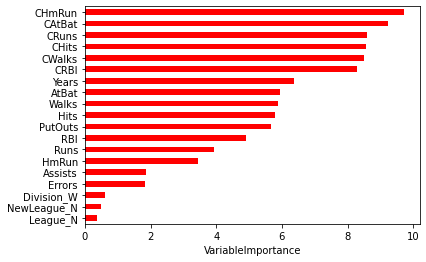

In [31]:
Importance=pd.DataFrame({"Importance":rf_tuned_model.feature_importances_*100}
                        ,index=x_train.columns)
Importance.sort_values(by="Importance",
                      axis=0,
                     ascending=True).plot(kind="barh"
                                         ,color="r")
plt.xlabel("VariableImportance")
plt.gca().legend_=None
#bu her ağaç hiyeraşısınde rastgele olur ama cartta ise en üsttekiydi                     

# Gradient Boosting Machines


In [47]:
#boosting=zayıf tahmincileri birleştirip güçlü kümülatif tahminciler(ağaçlar) bunları gradient algosuyla yapar

## Model ve Tahmin

In [32]:
gbm_model=GradientBoostingRegressor().fit(x_train,y_train)

In [35]:
y_pred=gbm_model.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

349.49336814792815

## Model Tuning

In [37]:
dir(gbm_model)

['_SUPPORTED_LOSS',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_initialized',
 '_check_n_features',
 '_check_params',
 '_clear_state',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_fit_stage',
 '_fit_stages',
 '_get_param_names',
 '_get_tags',
 '_init_state',
 '_is_initialized',
 '_make_estimator',
 '_more_tags',
 '_raw_predict',
 '_raw_predict_init',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_resize_state',
 '_rng',
 '_staged_raw_predict',
 '_validate_data',
 '_va

In [38]:
gbm_params={"learning_rate":[0.01,0.001],
           "loss":["ls","quantile"],
          "subsample":[1,0.5] }

In [39]:
gbm_model=GradientBoostingRegressor().fit(x_train,y_train)

In [41]:
gbm_params_cv=GridSearchCV(gbm_model,gbm_params,n_jobs=-1).fit(x_train,y_train)

In [42]:
gbm_params_cv.best_params_

{'learning_rate': 0.01, 'loss': 'ls', 'subsample': 0.5}

In [43]:
gbm_tuned=GradientBoostingRegressor(learning_rate=0.01,loss="ls",subsample=0.5).fit(x_train,y_train)

In [44]:
y_pred=gbm_tuned.predict(x_test)

In [45]:
np.sqrt(mean_squared_error(y_pred,y_test))

359.36467868525705

In [48]:
#genelde ne kadar fazla parametre o kadar az hata biz burda az girdik işlemci hepsini hesaplamada zorlanır diye

# XGBoost 

## Model ve Tahmin 

In [1]:
!pip install xgboost

In [4]:
import xgboost

In [10]:
from xgboost import XGBRegressor

In [6]:
xgb=XGBRegressor().fit(x_train,y_train)

In [7]:
y_pred=xgb.predict(x_test)

In [8]:
np.sqrt(mean_squared_error(y_test,y_pred))

355.46515176059927

## Model Tuning 

In [9]:
dir(xgb)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_can_use_inplace_predict',
 '_check_n_features',
 '_configure_fit',
 '_early_stopping_attr',
 '_estimator_type',
 '_get_iteration_range',
 '_get_param_names',
 '_get_tags',
 '_get_type',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_evaluation_result',
 '_validate_data',
 'apply',
 'base_score',
 'best_iteration',
 'best_ntree_limit',
 'best_score',
 'booster',
 'coef_',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'enable_categorical',
 'evals_result',
 'feature_importances_',
 'fit',
 'gamma',

In [10]:
xgb_params={"colsample_bytree":[0.4,0.7,1]}

In [11]:
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=5,n_jobs=-1).fit(x_train,y_train)#cv kaçkatlı olucağını söyler ayriyetten
#burda birden fazla girebilirdik ama hepsi aynı ztn ondan girmedim

In [12]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4}

In [13]:
xgb_tuned=XGBRegressor(colsample_bytree=0.4).fit(x_train,y_train)

In [14]:
y_pred=xgb_tuned.predict(x_test)

In [17]:
np.sqrt(mean_squared_error(y_test,y_pred))#sonuca takılma normalde daha az olması lzm

367.4824660988048

In [18]:
#en iyi algoritma bazen basit verilerde çalışmayabilir optime olamayabilir o yüzden kompleksliğine göre algoritma seçmek gerekir

# Light GBM

## Model ve Tahmin 

In [20]:
!pip install lightgbm

In [21]:
#bunlar sklearn de olmadığı yeni algolar olduğu için dışşardan indirdik

In [8]:
from lightgbm import LGBMRegressor

In [23]:
lgb=LGBMRegressor().fit(x_train,y_train)

In [25]:
y_pred=lgb.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

363.8712087611089

## Model Tuning

In [27]:
dir(lgb)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_base_doc',
 '_best_iteration',
 '_best_score',
 '_check_n_features',
 '_class_map',
 '_class_weight',
 '_classes',
 '_estimator_type',
 '_evals_result',
 '_fobj',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_n_classes',
 '_n_features',
 '_n_features_in',
 '_objective',
 '_other_params',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'best_iteration_',
 'best_score_',
 'booster_',
 'boosting_type',
 'class_weight',
 'colsample_bytree',
 'evals_result_',
 'feature_importances_',
 'feature_name_',
 'fit',
 'fitt

In [28]:
#aynı şeyleri yaptık ztn

In [29]:
#bu son algoritmaların hepsi bi öncekinden daha hızlı ve dayanıklı gelişmiş parametreleri verileri olanlarda daha başarılı oluyolar eskilerine nazaran ve hepsi gbm türevi

# CatBoost

In [30]:
#kategorik değişkenlerde kullanılan gbm

In [31]:
!pip install catboost

In [32]:
from catboost import CatBoostRegressor

## Model ve Tahmin 

In [34]:
catb_model=CatBoostRegressor().fit(x_train,y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 147ms	remaining: 2m 26s
1:	learn: 431.3923642	total: 148ms	remaining: 1m 13s
2:	learn: 424.8820360	total: 149ms	remaining: 49.5s
3:	learn: 418.2514904	total: 150ms	remaining: 37.3s
4:	learn: 412.6394021	total: 151ms	remaining: 30s
5:	learn: 406.6247020	total: 152ms	remaining: 25.1s
6:	learn: 400.5321206	total: 153ms	remaining: 21.7s
7:	learn: 394.6683437	total: 154ms	remaining: 19.1s
8:	learn: 388.2496484	total: 155ms	remaining: 17s
9:	learn: 382.9448842	total: 156ms	remaining: 15.4s
10:	learn: 377.2600080	total: 157ms	remaining: 14.1s
11:	learn: 372.4829606	total: 158ms	remaining: 13s
12:	learn: 366.6823437	total: 159ms	remaining: 12s
13:	learn: 362.6076230	total: 160ms	remaining: 11.3s
14:	learn: 358.0107745	total: 161ms	remaining: 10.6s
15:	learn: 353.2802665	total: 162ms	remaining: 9.96s
16:	learn: 348.5646265	total: 163ms	remaining: 9.43s
17:	learn: 343.6407912	total: 164ms	remaining: 8.95s
18:	learn: 339.2363847	total: 16

201:	learn: 127.4951417	total: 352ms	remaining: 1.39s
202:	learn: 127.0315349	total: 353ms	remaining: 1.39s
203:	learn: 126.7791475	total: 355ms	remaining: 1.38s
204:	learn: 126.4903107	total: 357ms	remaining: 1.38s
205:	learn: 126.0664803	total: 358ms	remaining: 1.38s
206:	learn: 125.3934071	total: 359ms	remaining: 1.38s
207:	learn: 125.0899622	total: 361ms	remaining: 1.37s
208:	learn: 124.7757310	total: 362ms	remaining: 1.37s
209:	learn: 124.5475960	total: 364ms	remaining: 1.37s
210:	learn: 124.1962887	total: 365ms	remaining: 1.37s
211:	learn: 123.9686937	total: 367ms	remaining: 1.36s
212:	learn: 123.0280048	total: 369ms	remaining: 1.36s
213:	learn: 122.5447141	total: 370ms	remaining: 1.36s
214:	learn: 122.1785305	total: 372ms	remaining: 1.36s
215:	learn: 121.4403560	total: 374ms	remaining: 1.35s
216:	learn: 120.8269584	total: 375ms	remaining: 1.35s
217:	learn: 120.2399329	total: 376ms	remaining: 1.35s
218:	learn: 119.4852557	total: 378ms	remaining: 1.35s
219:	learn: 119.2094151	tota

476:	learn: 52.3688770	total: 686ms	remaining: 752ms
477:	learn: 52.2402473	total: 687ms	remaining: 751ms
478:	learn: 52.1406517	total: 688ms	remaining: 749ms
479:	learn: 52.1107144	total: 689ms	remaining: 746ms
480:	learn: 51.9239449	total: 690ms	remaining: 744ms
481:	learn: 51.7096820	total: 691ms	remaining: 742ms
482:	learn: 51.6266918	total: 692ms	remaining: 740ms
483:	learn: 51.5969797	total: 693ms	remaining: 738ms
484:	learn: 51.4480162	total: 693ms	remaining: 736ms
485:	learn: 51.2269261	total: 694ms	remaining: 734ms
486:	learn: 50.9904632	total: 695ms	remaining: 732ms
487:	learn: 50.9342043	total: 696ms	remaining: 730ms
488:	learn: 50.8423680	total: 697ms	remaining: 729ms
489:	learn: 50.7269788	total: 698ms	remaining: 727ms
490:	learn: 50.5384699	total: 699ms	remaining: 725ms
491:	learn: 50.5047793	total: 700ms	remaining: 723ms
492:	learn: 50.3234448	total: 701ms	remaining: 721ms
493:	learn: 50.1653421	total: 702ms	remaining: 719ms
494:	learn: 49.9835558	total: 703ms	remaining:

635:	learn: 31.5709628	total: 856ms	remaining: 490ms
636:	learn: 31.4052213	total: 858ms	remaining: 489ms
637:	learn: 31.2452229	total: 859ms	remaining: 487ms
638:	learn: 31.1221828	total: 860ms	remaining: 486ms
639:	learn: 31.0853500	total: 861ms	remaining: 484ms
640:	learn: 30.9167355	total: 862ms	remaining: 483ms
641:	learn: 30.8667253	total: 863ms	remaining: 481ms
642:	learn: 30.7427129	total: 864ms	remaining: 480ms
643:	learn: 30.5748228	total: 865ms	remaining: 478ms
644:	learn: 30.5080592	total: 866ms	remaining: 477ms
645:	learn: 30.3444228	total: 867ms	remaining: 475ms
646:	learn: 30.1858385	total: 868ms	remaining: 474ms
647:	learn: 30.1481951	total: 870ms	remaining: 472ms
648:	learn: 30.1139150	total: 871ms	remaining: 471ms
649:	learn: 30.0147177	total: 872ms	remaining: 470ms
650:	learn: 29.8610501	total: 873ms	remaining: 468ms
651:	learn: 29.7793561	total: 874ms	remaining: 467ms
652:	learn: 29.6870188	total: 875ms	remaining: 465ms
653:	learn: 29.6229921	total: 876ms	remaining:

797:	learn: 20.2776166	total: 1.03s	remaining: 261ms
798:	learn: 20.2690965	total: 1.03s	remaining: 259ms
799:	learn: 20.2166634	total: 1.03s	remaining: 258ms
800:	learn: 20.1160179	total: 1.03s	remaining: 257ms
801:	learn: 20.0642268	total: 1.03s	remaining: 255ms
802:	learn: 20.0323601	total: 1.03s	remaining: 254ms
803:	learn: 19.9485334	total: 1.03s	remaining: 253ms
804:	learn: 19.9071725	total: 1.04s	remaining: 251ms
805:	learn: 19.8943564	total: 1.04s	remaining: 250ms
806:	learn: 19.7804687	total: 1.04s	remaining: 248ms
807:	learn: 19.7343406	total: 1.04s	remaining: 247ms
808:	learn: 19.6963930	total: 1.04s	remaining: 246ms
809:	learn: 19.6705675	total: 1.04s	remaining: 244ms
810:	learn: 19.6382933	total: 1.04s	remaining: 243ms
811:	learn: 19.5889191	total: 1.04s	remaining: 242ms
812:	learn: 19.5638487	total: 1.04s	remaining: 240ms
813:	learn: 19.4926424	total: 1.05s	remaining: 239ms
814:	learn: 19.3961396	total: 1.05s	remaining: 238ms
815:	learn: 19.3880242	total: 1.05s	remaining:

966:	learn: 12.5186020	total: 1.2s	remaining: 41ms
967:	learn: 12.4787889	total: 1.2s	remaining: 39.8ms
968:	learn: 12.4463866	total: 1.2s	remaining: 38.5ms
969:	learn: 12.3919484	total: 1.2s	remaining: 37.3ms
970:	learn: 12.3583173	total: 1.21s	remaining: 36ms
971:	learn: 12.3430204	total: 1.21s	remaining: 34.8ms
972:	learn: 12.3036135	total: 1.21s	remaining: 33.5ms
973:	learn: 12.2785886	total: 1.21s	remaining: 32.3ms
974:	learn: 12.2424148	total: 1.21s	remaining: 31ms
975:	learn: 12.2287225	total: 1.21s	remaining: 29.8ms
976:	learn: 12.1894056	total: 1.21s	remaining: 28.5ms
977:	learn: 12.1399699	total: 1.21s	remaining: 27.3ms
978:	learn: 12.1165698	total: 1.21s	remaining: 26ms
979:	learn: 12.1084930	total: 1.21s	remaining: 24.8ms
980:	learn: 12.1041455	total: 1.22s	remaining: 23.6ms
981:	learn: 12.0749440	total: 1.22s	remaining: 22.3ms
982:	learn: 12.0676323	total: 1.22s	remaining: 21.1ms
983:	learn: 12.0253491	total: 1.22s	remaining: 19.8ms
984:	learn: 11.9725269	total: 1.22s	rema

In [35]:
y_pred=catb_model.predict(x_test)

In [36]:
np.sqrt(mean_squared_error(y_test,y_pred))

351.194631344607

## Model Tuning

In [37]:
#burda gene aynı ama catboostta
#iterations=estimators(ağaç)
#depth=max_depth

# Makine Öğrenmesi Görevlerinin Otomatikleştirilmesi

In [4]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])

In [5]:
def compML(df, y, alg):
    
    #train-test ayrimi
    y = df[y] # bagimli degiskeni gelecek
    X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
    X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
    #modelleme
    model = alg().fit(X_train,y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    # modelin ismi alacak
    model_ismi = alg.__name__
    print(model_ismi, "Modeli test hatasi:", RMSE)

In [6]:
compML(df, "Salary", SVR)

SVR Modeli test hatasi: 460.0032657244849


In [11]:
models = [LGBMRegressor, 
         XGBRegressor,
         GradientBoostingRegressor,
         RandomForestRegressor,
         DecisionTreeRegressor,
         MLPRegressor,
         KNeighborsRegressor,
         SVR]
for i in models:
    (i, "Algrtm Test Hatası:", compML(df, "Salary", i))

LGBMRegressor Modeli test hatasi: 363.8712087611089
XGBRegressor Modeli test hatasi: 355.46515176059927
GradientBoostingRegressor Modeli test hatasi: 350.94108915338774
RandomForestRegressor Modeli test hatasi: 345.37968989032976
DecisionTreeRegressor Modeli test hatasi: 482.4955274080504
MLPRegressor Modeli test hatasi: 443.5028576497631
KNeighborsRegressor Modeli test hatasi: 426.6570764525201
SVR Modeli test hatasi: 460.0032657244849
